In [21]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [2]:
transform= transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ]
)

# Download and Load the dataset

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,
                                       download=True, transform=transform)

100%|████████████████████████████████████████████████████████████████| 170498071/170498071 [03:51<00:00, 735156.05it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data


In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                         shuffle=True)

In [8]:
testset = torchvision.datasets.CIFAR10(root='./data',train=False,
                                       download=True, transform=transform)

Files already downloaded and verified


In [9]:
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

In [12]:
for (X,y) in trainloader:
    print(X.shape)
    print(y.shape)
    break

torch.Size([64, 3, 32, 32])
torch.Size([64])


In [14]:
dataiter = iter(trainloader)
data = next(dataiter)
inputs, targets = data
print(inputs.shape, targets.shape)

torch.Size([64, 3, 32, 32]) torch.Size([64])


Traget_value: tensor(8)
Traget_value: tensor(4)
Traget_value: tensor(7)
Traget_value: tensor(7)
Traget_value: tensor(9)
Traget_value: tensor(9)


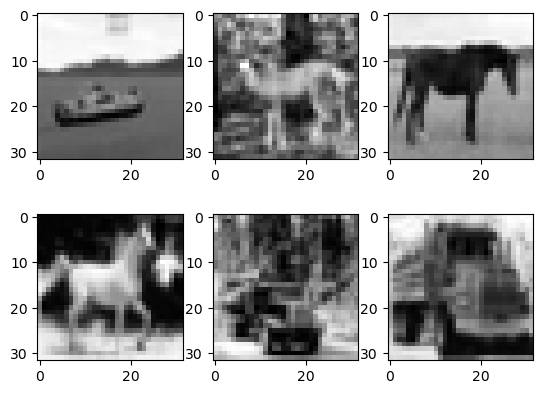

In [17]:
import matplotlib.pyplot as plt
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(inputs[i][0],cmap='gray')
    print("Traget_value:",targets[i])
plt.show()

# Create custom dataset (image)

In [7]:
class CustomData1(Dataset):
    def __init__(self, annoted_file, root_dir, transform=None):
        self.annotations=pd.read_csv(annoted_file)
        self.root_dir=root_dir
        self.transform=transform
        
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self,index):
        img_path= os.path.join( self.root_dir,self.annotations.iloc[index,0])
        image=Image.open(img_path)
        label= torch.tensor(int(self.annotations.iloc[index,1]))
        if self.transform:
            image=self.transform(image)
            
        return (image,label)

In [10]:
annoted_file="C:/Users/HP/Py Code/NN/Pytorch/data/dogs-vs-cats/cats_dogs.csv"
root_dir="C:/Users/HP/Py Code/NN/Pytorch/data/dogs-vs-cats/cats_dogs_resized"

In [11]:
dataset = CustomData1(annoted_file, root_dir, transform)

In [12]:
trainset, testset= torch.utils.data.random_split(dataset, [5,5])

In [13]:
trainloader = DataLoader(trainset, batch_size=1,
                                         shuffle=True)

In [14]:
testloader = DataLoader(testset, batch_size=1,
                                         shuffle=False)

In [15]:
len(testset)

5

In [16]:
len(trainloader)

5

In [17]:
len(trainset)

5

In [18]:
len(testloader)

5

In [19]:
for X,y in trainloader:
    print(X.shape)
    print(y.shape)
    break

torch.Size([1, 3, 224, 224])
torch.Size([1])


# Load the CSV file

In [20]:
class CustomData2(Dataset):
    def __init__(self, annoted_file):
        self.annotations=pd.read_csv(annoted_file)
        self.X= self.annotations.iloc[:,1:]
        self.y= self.annotations.iloc[:,0]
        
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self,index):
        return self.X[index],self.y[index]
            
        

In [24]:
annoted_file="C:/Users/HP/Py Code/NN/Pytorch/data/wine.csv"

In [25]:
dataset = CustomData2(annoted_file)

In [26]:
len(dataset)

178

In [27]:
trainset, testset= torch.utils.data.random_split(dataset, [100, 78])

In [28]:
trainloader = DataLoader(trainset, batch_size=4,
                                         shuffle=True)

In [29]:
testloader = DataLoader(testset, batch_size=4,
                                         shuffle=False)

# Load the text file

In [22]:
class CustomData3(Dataset):
    def __init__(self):
        xy=np.loadtxt('C:/Users/HP/Py Code/colab/Pytorch/DataLoader/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples=xy.shape[0]
        self.x= torch.from_numpy(xy[:,1:])
        self.y= torch.from_numpy(xy[:,[0]])


    def __getitem__(self, index):
        return self.x[index],self.y[index]

    def __len__(self):
        return self.n_samples


In [23]:
dataset = CustomData3()
train_loader=DataLoader(dataset=dataset, batch_size=4,shuffle=True)
total_batch=len(train_loader)
total_batch

45